#### Forward propagation:
We work forward through the network producing an output result for a current given input from the dataset. A loss function is then evaluated that tells us how well the network did at predicting the correct outputs.
#### Backward propagation: 
We work backward through the network calculating the impact each weight had on producing the current loss of the network.

Backpropagation is used to calculate gradients that tell us what effect each weight had on producing the current loss. After gradients are found an optimization technique such as gradient descent uses them to update the weights in such a way that we can minimize the value of the loss function.

#### Batches
Using a larger batch size will allow for a larger learning rate. The trade-off is that more memory is required to hold this batch while training.

#### Loss functions
During the training phase, we need to correctly predict our training set with our current set of weights; this process consists of evaluating our training set inputs X and comparing with the desired output Y. Some sort of mechanism is needed to quantify (return a scalar number) on how good our current set of weights are in terms of correctly predicting our desired outputs. This mechanism is named the loss function.

The backpropagation algorithm should return the derivative of each parameter with respect to the loss function. This means we find out how changing each parameter will affect the value of the loss function. It is then the job of the optimization algorithm to minimize the loss function

### The optimizer and its hyperparameters
The job of the optimizer is to update the network weights in a way that is going to minimize the training loss error.
The most basic of these is simply called gradient descent (sometimes called vanilla gradient descent), but more complex ones that try to improve on it have been developed. Some popular ones are:

- Gradient descent with momentum
- RMSProp
- Adam
- tf.train

### Learning rate: 
Control how quickly your optimizer tries to minimize the loss function. Set it too high and you will have problems converging to a minimum. Set it too small and it will take forever to converge or get trapped in a bad local minimum.

Another important aspect of the learning rate is that as your training progresses and the error drops, the learning rate value that you chose at the beginning of the training might become too big, and so you may start to overshoot the minimum.

To solve this issue, you may schedule a learning rate decay that from time to time decrease the learning rate as you train. This process is called learning rate scheduling

#### Underfitting versus overfitting
- The first of these problems is if your model is too big for the amount, or complexity, of your training data. As the model has so many parameters, it can easily just learn exactly what it sees in your training set even down to the noise that is present in the data. This is a problem because when the network is presented with data that is not exactly like the training set, it will not perform well because it has learned too precisely what the data looks like and has missed the bigger picture behind it. This issue is called overfitting or having high-variance.
- On the other hand, you might choose a network that is not big enough to capture the data complexity. We now have the opposite problem, and your model is unable to capture the underlying structure behind your dataset well enough as it doesn’t have the capacity (parameters) to fully learn. The network will again not be able to perform well on new data. This issue is called underfitting or having high-bias.

- Getting more data
- Stopping when you detect that the error on the test data starts to grow (early-stopping)
- Starting the model design as simple as possible and only adding complexity when you detect underfitting

### Feature scaling

 if you do some preprocessing of your data at train time, you must do this exact same preprocessing at test time otherwise expect to get some bad results!

### Fully connected layer
The layers of neurons that make up the ANNs that we saw earlier are commonly called densely connected layers, or fully connected (FC) layers or simply just linear layers.
- dense_layer = tf.layers.dense(inputs=some_input_layer, units=1024, activation=tf.nn.relu) <br>
It is important to note that the input of this layer has to have just two dimensions, so if your input is a spatial tensor for example an image of shape [28*28*3] you will have to reshape it into a vector before inputting it 
- reshaped_input_to_dense_layer = tf.reshape(spatial_tensor_in, [-1, 28 * 28 * 3]) 

### Convolutional neural networks

A CNN is mainly composed of layers called convolution layers that filter their layer inputs to find useful features within those inputs. This filtering operation is called convolution, which gives rise to the name of this kind of neural network.

Two-dimensional convolutions are used in image processing to implement image filters, for example, to find a specific patch on an image or to find some feature in an image.<br>

In CNNs, the convolutional layers filter an input tensor in a tile like fashion with a small window called a kernel. The kernel is what defines exactly the things a convolution operation is going to filter for and will produce a strong response when it finds what it’s looking for.

- <b>Kernel size (K):</b> How big your sliding windows are in pixels. Small is generally better and usually odd value such as 1,3,5 or sometimes rarely 7 are used.
- <b>Stride (S): </b>How many pixels the kernel window will slide at each step of convolution. This is usually set to 1, so no locations are missed in an image but can be higher if we want to reduce the input size down at the same time.
- <b>Zero padding (pad):</b> The amount of zeros to put on the image border. Using padding allows the kernel to completely filter every location of an input image, including the edges<br>
- <b> Number of filters (F):</b> How many filters our convolution layer will have. It controls the number of patterns or features that a convolution layer will look for.

#### Input padding
The convolution operation will output a result that is spatially smaller than the input to it. To avoid this effect and to ensure that our convolution kernel looks at every image location, we can place zeros on the border of our input image. When we do this, we are said to be padding the image

#### Converting convolution layers into fully connected layers

Actually, we can consider fully connected layers as a subset of convolution layers. It’s possible to convert a CNN layer into a fully connected layer if we set the kernel size to match the input size. Setting the number of filters is then the same as setting the number of output neurons in a fully connected layer. Check for yourself that in this case, the operations will be the same.

###  pooling layer

The pooling layer is used to reduce the spatial dimensions of our activation tensors, but not volume depth, in a CNN. They are non parametric way of doing this, meaning that the pooling layer has no weights in it. Basically, the following is what you gain from using pooling:<br>

- Cheap way of summarizing spatially related information in an input tensor
- By having less spatial information, you gain computation performance
- You get some translation invariance in your network <br>
However one of the big advantage of pooling, that it has no parameters to learn, is also its biggest disadvantage because pooling can end up just throwing important information away. As a result, pooling is starting to be used less frequently in CNNs now.

What Is a Convolutional Neural Network?
 

A Convolutional Neural Network (CNN) is the foundation of most computer vision technologies. Unlike traditional multilayer perceptron architectures, it uses two operations called ‘convolution’ and pooling’ to reduce an image into its essential features, and uses those features to understand and classify the image.

The basic building blocks of CNN are:

- Convolution layer━a “filter”, sometimes called a “kernel”, is passed over the image, viewing a few pixels at a time (for example, 3X3 or 5X5). The convolution operation is a dot product of the original pixel values with weights defined in the filter. The results are summed up into one number that represents all the pixels the filter observed.
- Activation layer━the convolution layer generates a matrix that is much smaller in size than the original image. This matrix is run through an activation layer, which introduces non-linearity to allow the network to train itself via backpropagation. The activation function is typically ReLu.
- Pooling layer━“pooling” is the process of further downsampling and reducing the size of the matrix. A filter is passed over the results of the previous layer and selects one number out of each group of values (typically the maximum, this is called max pooling). This allows the network to train much faster, focusing on the most important information in each feature of the image.
- Fully connected layer━a traditional multilayer perceptron structure. Its input is a one-dimensional vector representing the output of the previous layers. Its output is a list of probabilities for different possible labels attached to the image (e.g. dog, cat, bird). The label that receives the highest probability is the classification decision.
There may be multiple activation and pooling layers, depending on the CNN architecture.



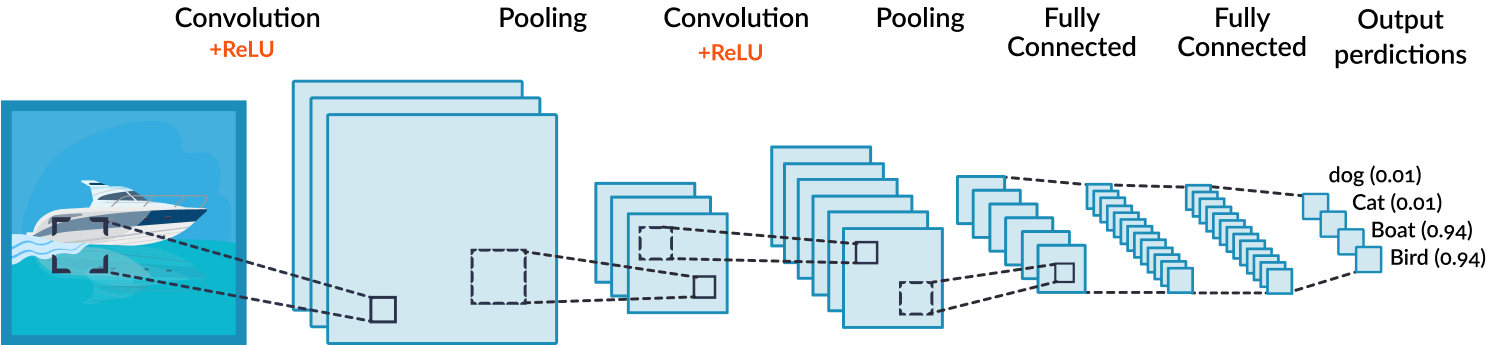

In [7]:
from IPython.display import Image
Image(filename='./images/conv1.png')